# Road Safety

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as ex
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import pandasql as ps

#StandardScaler- removes the mean and scales each feature/variable to unit variance
#LabelEncoder- to normalise labels, to transform to numerical labels

In [2]:
sns.set(style= 'whitegrid', color_codes=True)
# %matplotlib inline

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df= pd.read_csv('/Users/amisha/Projects/Road-safety-analysis/UK_Accident.csv')
# final_df = pd.concat(sub_sets)
final_df= df
final_df.shape

(1504150, 33)

In [4]:
final_df.sample(4)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
999062,429051,201145MO59633,517190.0,149830.0,-0.322753,51.235569,45,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01030537,2011
1056690,17237,201201TW60160,521830.0,176390.0,-0.247233,51.473311,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01003854,2012
450020,450020,200714B147307,439540.0,410580.0,-1.404121,53.590308,14,3,2,3,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01007331,2007
1479939,440486,201450EL2F007,249959.0,57539.0,-4.112530,50.398460,50,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01015069,2014


Number of casualties in each day of the week

In [5]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [6]:
final_df['Year'].unique()
final_df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [7]:
# dropping Junction_Detail as this column doesn't contribute anything
# final_df.drop(["Junction_Detail"],axis=1,inplace = True)

In [8]:
# As NULL values are less as compared to size of whole data
# So, Preprocessing the data and filling the null values with logically identified values from each feature.
final_df['Road_Surface_Conditions'].fillna(value = 'Normal', inplace = True)
final_df['Special_Conditions_at_Site'].fillna(value = 'None', inplace = True)
final_df['Carriageway_Hazards'].fillna(value = 'None', inplace = True)
final_df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(value = 'No', inplace = True)
final_df['Weather_Conditions'].fillna(value = 'Unknown', inplace = True)
final_df['Junction_Control'].fillna(value = 'None', inplace = True)
final_df['Location_Northing_OSGR'].fillna(value = 0, inplace = True)
final_df['Latitude'].fillna(value = 0, inplace = True)

In [9]:
data = {'Casualties_Count' : final_df['Number_of_Casualties'],
             'Day_of_Week' : final_df['Day_of_Week']}
accidents_per_week = pd.DataFrame(data)
accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

,Casualties_Count
Day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


In [10]:
cas_count= accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

In [11]:
# getting group-by size for sorting of color intensity according to Count values
size_gb= accidents_per_week.groupby(by='Day_of_Week').size()
dev_color= size_gb.argsort().argsort() 
# argsort for index wise sorting
pal= sns.color_palette('Reds', len(dev_color)) 
# choose color palette accordingly

<AxesSubplot:xlabel='Day_of_Week', ylabel='count'>

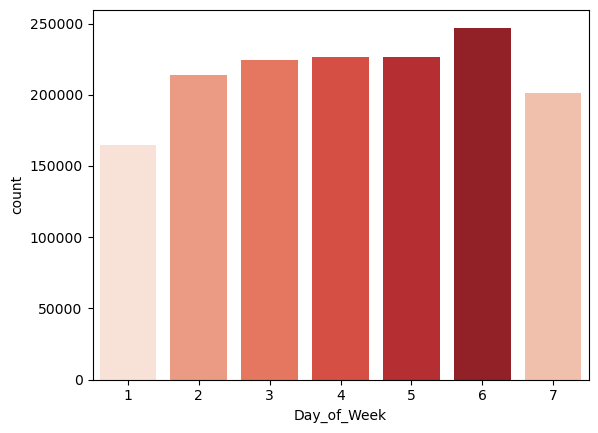

In [12]:
sns.countplot(x=accidents_per_week.Day_of_Week, 
              data=accidents_per_week,
              palette=np.array(pal[::])[dev_color]) 
# 6th day of the week has seen more number of accidents

Maximum and minimum speed limits on the roads the accidents happened

In [13]:
accidents_per_week['Speed_Limit'] = final_df.Speed_limit
accidents_per_week.sample(4)

,Casualties_Count,Day_of_Week,Speed_Limit
128730,1,3,30
1337312,1,5,30
938157,1,6,30
1177645,1,2,30


In [14]:
chunks = []
for val in range(1,8) : 
    # Since there are 7 days, we're using the loop from 1 to 8.
    qurery1 = """select accidents_per_week.Day_of_Week, sum(accidents_per_week.Casualties_Count) Casualties_Count,
            max(accidents_per_week.Speed_Limit) Max_Speed ,min(accidents_per_week.Speed_Limit) Min_Speed
            from accidents_per_week where accidents_per_week.Casualties_Count > 0 and accidents_per_week.Day_of_Week= """+str(val)
    chunks.append(ps.sqldf(qurery1, locals())) 
    # parameters (Query, db_url) and returns DataFrame
    
speed_limit_accident_data = pd.concat(chunks, ignore_index=True) # concatination of chunks

In [15]:
speed_limit_accident_data

,Day_of_Week,Casualties_Count,Max_Speed,Min_Speed
0,1,239532,70,10
1,2,284043,70,10
2,3,294476,70,10
3,4,297756,70,20
4,5,299044,70,10
5,6,331934,70,10
6,7,285261,70,10


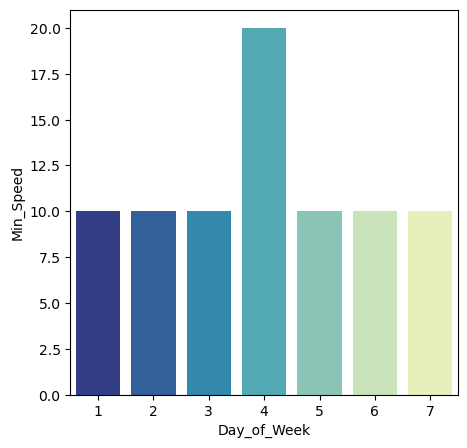

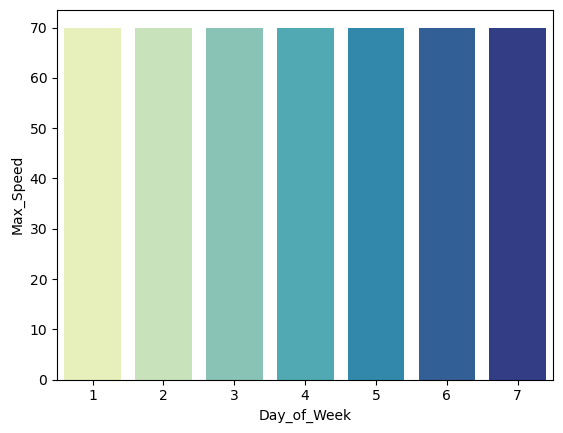

In [16]:
val = ["Max-Speed","Min_Speed"]
plt.figure(figsize=(5,5))
sns.barplot(x='Day_of_Week', y = 'Min_Speed' , data=speed_limit_accident_data, palette='YlGnBu_r')
plt.show()
sns.barplot(x='Day_of_Week', y = 'Max_Speed' , data=speed_limit_accident_data, palette='YlGnBu')
plt.show()

Importance of light and weather conditions in predicting accident severity

In [17]:
accident_severity_data = {'Light_Conditions' : final_df.Light_Conditions, 
                          'Weather_Conditions' : final_df.Weather_Conditions,
                          'Accident_Severity' : final_df.Accident_Severity}
accident_severity_df = pd.DataFrame(accident_severity_data)
accident_severity_df.sample(4)

,Light_Conditions,Weather_Conditions,Accident_Severity
1119385,Darkeness: No street lighting,Fine without high winds,3
788655,Daylight: Street light present,Fine without high winds,2
240069,Daylight: Street light present,Unknown,3
290603,Daylight: Street light present,Fine without high winds,3


In [18]:
print(accident_severity_df.describe(),'\n')
print(accident_severity_df.info())

       Accident_Severity
count       1.504150e+06
mean        2.838190e+00
std         4.018423e-01
min         1.000000e+00
25%         3.000000e+00
50%         3.000000e+00
75%         3.000000e+00
max         3.000000e+00 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Light_Conditions    1504150 non-null  object
 1   Weather_Conditions  1504150 non-null  object
 2   Accident_Severity   1504150 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 34.4+ MB
None


In [19]:
# Converting Object data-type into Category datatype
for object_feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
     accident_severity_df[object_feature] = accident_severity_df[object_feature].astype('category')

In [20]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   Light_Conditions    1504150 non-null  category
 1   Weather_Conditions  1504150 non-null  category
 2   Accident_Severity   1504150 non-null  int64   
dtypes: category(2), int64(1)
memory usage: 14.3 MB


In [21]:
# One Hot Encoding the categorical columns
accident_severity_df = pd.get_dummies(data=accident_severity_df, columns=['Light_Conditions', 'Weather_Conditions'])

In [22]:
accident_severity_df.sample(2)

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
1422658,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0
33042,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
# Correlation between 'Accident_Severity' and rest of variables
accident_severity = accident_severity_df.corr().loc['Accident_Severity':] 
accident_severity = pd.DataFrame(accident_severity)

In [24]:
# np.hstack(np.split(accident_severity, 1))
accident_severity

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
Accident_Severity,1.000000,-0.071174,0.002657,-0.018362,-0.003769,0.053096,-0.005982,-0.025910,-0.004042,0.012961,0.000549,0.018437,0.003080,0.010913,0.017108
Light_Conditions_Darkeness: No street lighting,-0.071174,1.000000,-0.025083,-0.119369,-0.016370,-0.399076,0.018572,-0.074911,0.058249,0.037683,0.048193,0.033486,0.028193,0.031123,-0.015329
Light_Conditions_Darkness: Street lighting unknown,0.002657,-0.025083,1.000000,-0.051555,-0.007070,-0.172360,-0.002335,-0.044742,0.005986,0.002229,0.000384,-0.006382,0.000715,0.003057,0.140243
Light_Conditions_Darkness: Street lights present and lit,-0.018362,-0.119369,-0.051555,1.000000,-0.033648,-0.820269,0.006970,-0.093839,0.011799,0.031787,0.041990,0.081967,0.001151,0.016986,-0.012381
Light_Conditions_Darkness: Street lights present but unlit,-0.003769,-0.016370,-0.007070,-0.033648,1.000000,-0.112492,0.003017,-0.018033,0.005796,0.008136,0.010302,0.012519,0.002725,0.001946,-0.001917
Light_Conditions_Daylight: Street light present,0.053096,-0.399076,-0.172360,-0.820269,-0.112492,1.000000,-0.015741,0.136071,-0.042865,-0.049729,-0.064212,-0.091339,-0.016129,-0.032296,-0.013322
Weather_Conditions_Fine with high winds,-0.005982,0.018572,-0.002335,0.006970,0.003017,-0.015741,1.000000,-0.222582,-0.008224,-0.016776,-0.013166,-0.040677,-0.004015,-0.009670,-0.015425
Weather_Conditions_Fine without high winds,-0.025910,-0.074911,-0.044742,-0.093839,-0.018033,0.136071,-0.222582,1.000000,-0.148175,-0.302260,-0.237214,-0.732891,-0.072337,-0.174238,-0.277918
Weather_Conditions_Fog or mist,-0.004042,0.058249,0.005986,0.011799,0.005796,-0.042865,-0.008224,-0.148175,1.000000,-0.011168,-0.008765,-0.027079,-0.002673,-0.006438,-0.010268
Weather_Conditions_Other,0.012961,0.037683,0.002229,0.031787,0.008136,-0.049729,-0.016776,-0.302260,-0.011168,1.000000,-0.017879,-0.055238,-0.005452,-0.013132,-0.020947


<AxesSubplot:>

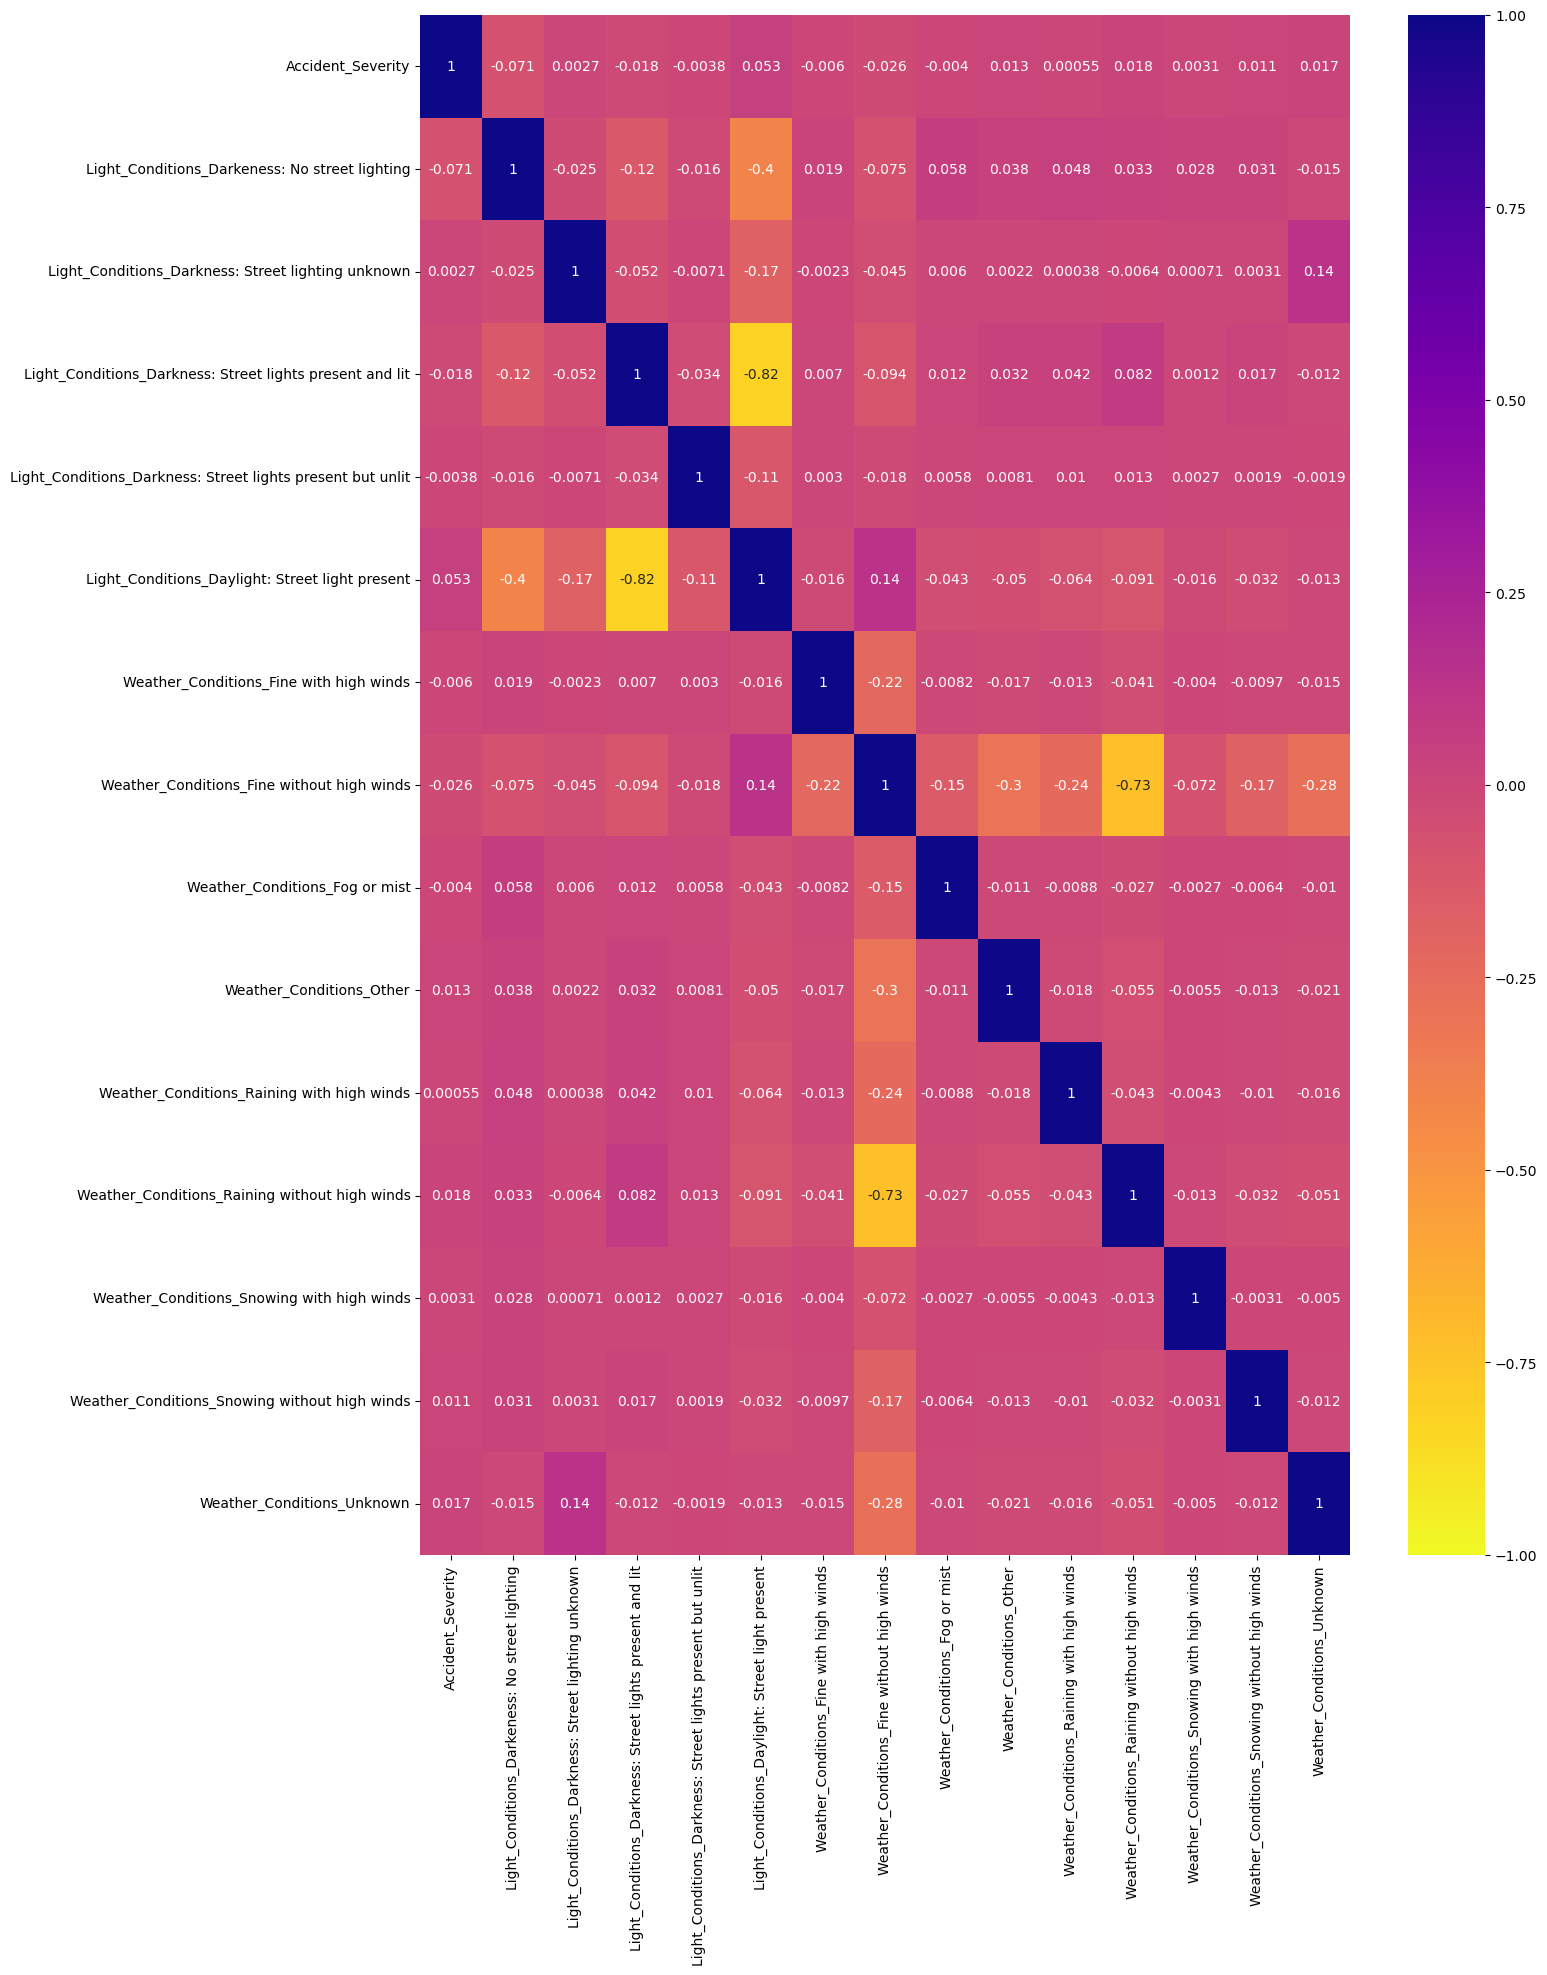

In [25]:
plt.figure(figsize=(15,20))
sns.heatmap(accident_severity, vmin=-1, cmap='plasma_r', annot = True)

### <u>Intuition (Summary):
- As per our intuition, we can say that the number of accidents will be more when the light and weather conditions are at worse. Like when there is no there light present at night, the number of accidents could be more. Similarly, in bad weather conditions like too much winds, rainfall or snowing could lead to more number of accidents.

- From Data: From the above correlation matrix of the data, we can observe that both Light_conditions and Weather_Conditions doesn't have much effect on Accident_severity as they are almost close to 0. Light_conditions with Street Light present is more impactful compared to Weather_Conditions.

- So the interpretation could be like when Street Light is present compared Daytime, the number of accidents being caused and their severity are much higher.

Implementation of prediction(regression) model:

Removing logically unnecessary columns

In [27]:
# From the above correlation, we have seen that Light_Conditions and Weather_Conditions are not much impactful,
# so we can drop them
accident_severity_df =final_df.copy()
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [29]:
accident_severity_df['Pedestrian_Crossing-Human_Control'].value_counts() 
#returns a series containing counts of unique values

None within 50 metres                 1495269
Control by other authorised person       5220
Control by school crossing patrol        3644
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [30]:
accident_severity_df['Pedestrian_Crossing-Physical_Facilities'].value_counts() 

No physical crossing within 50 meters          1252571
Pedestrian phase at traffic signal junction     100248
non-junction pedestrian crossing                 79231
Zebra crossing                                   40106
Central refuge                                   27660
Footbridge or subway                              4300
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

In [31]:
accident_severity_df['Light_Conditions'].value_counts() 

Daylight: Street light present               1102222
Darkness: Street lights present and lit       296340
Darkeness: No street lighting                  82559
Darkness: Street lighting unknown              16120
Darkness: Street lights present but unlit       6909
Name: Light_Conditions, dtype: int64

In [32]:
accident_severity_df['Special_Conditions_at_Site'].value_counts() 

None                                               1467568
Roadworks                                            17223
Ol or diesel                                          5243
Mud                                                   4610
Road surface defective                                3664
Auto traffic singal out                               2788
Permanent sign or marking defective or obscured       2269
Auto traffic signal partly defective                   785
Name: Special_Conditions_at_Site, dtype: int64

In [33]:
accident_severity_df['Carriageway_Hazards'].value_counts()

None                                       1476900
Other object in carriageway                  11762
Any animal (except a ridden horse)            8014
Pedestrian in carriageway (not injured)       3586
Involvement with previous accident            2282
Dislodged vehicle load in carriageway         1606
Name: Carriageway_Hazards, dtype: int64

In [34]:
accident_severity_df['Junction_Control'].value_counts()

Giveway or uncontrolled     733940
None                        602835
Automatic traffic signal    155717
Stop Sign                     9179
Authorised person             2479
Name: Junction_Control, dtype: int64

#### From above Numbers,
- Pedestrian_Crossing can be dropped as almost 90% of the data is None
- Pedestrian_Crossing-Physical_Facilities can be dropped as almost 80% of the data is None
- Light_Conditions can be dropped as earlier we have seen Light_Conditions & Weather_Conditions are not much impactful
- Special_Conditions_at_Site can be dropped as 90% data is None
- Carriageway_Hazards can be dropped as 90% data is None
- Did_Police_Officer_Attend_Scene_of_Accident can be dropped as Police comes after the accident has occured and it doesn't logically impact the severity of the accident
- Carriageway_Hazards can be dropped as 90% data is None 
- We can also drop Accident_Index as it only keeps the count of the accidents
- We can also drop Date, Time of Accidents as logically they don't impact the Severity of Accidents

In [35]:
drop_cols= ['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions'
           ,'Special_Conditions_at_Site','Carriageway_Hazards','Carriageway_Hazards','Junction_Control'
           ,'Did_Police_Officer_Attend_Scene_of_Accident']

<AxesSubplot:xlabel='Road_Type', ylabel='Accident_Severity'>

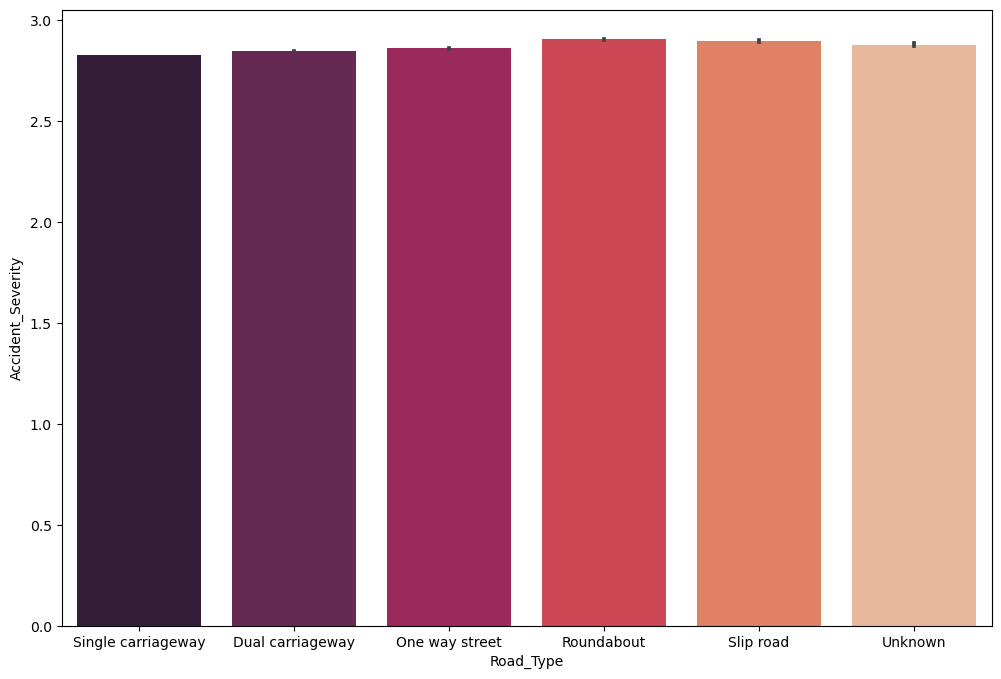

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Road_Type', y = 'Accident_Severity', data = accident_severity_df, palette='rocket')

<AxesSubplot:xlabel='Road_Surface_Conditions', ylabel='Accident_Severity'>

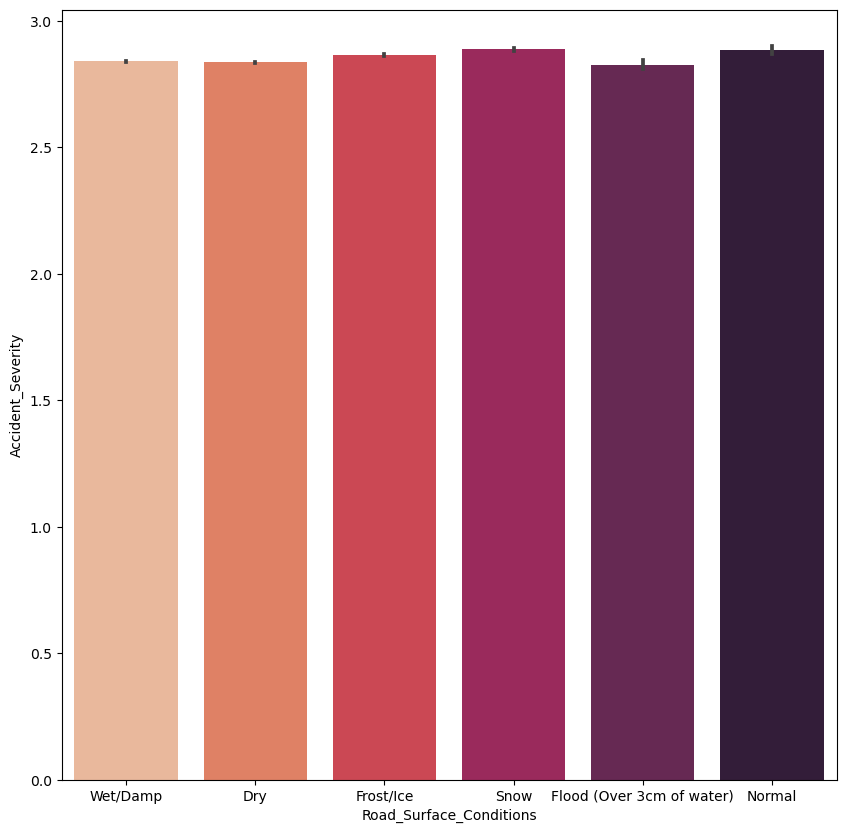

In [37]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Road_Surface_Conditions', y = 'Accident_Severity', data = accident_severity_df, palette='rocket_r')

In [38]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
    accident_severity_df.drop(columns = feature, inplace = True)

In [39]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1504150 non-null  int64  
 1   Location_Easting_OSGR       1504049 non-null  float64
 2   Location_Northing_OSGR      1504150 non-null  float64
 3   Longitude                   1504049 non-null  float64
 4   Latitude                    1504150 non-null  float64
 5   Police_Force                1504150 non-null  int64  
 6   Accident_Severity           1504150 non-null  int64  
 7   Number_of_Vehicles          1504150 non-null  int64  
 8   Number_of_Casualties        1504150 non-null  int64  
 9   Day_of_Week                 1504150 non-null  int64  
 10  Local_Authority_(District)  1504150 non-null  int64  
 11  1st_Road_Class              1504150 non-null  int64  
 12  1st_Road_Number             1504150 non-null  int64  
 1

In [40]:
corr_matrix = accident_severity_df.corr()
corr_matrix

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Unnamed: 0,1.000000,-0.099098,-0.018978,-0.101058,-0.018249,0.333496,-0.011277,0.003448,0.005047,-0.001842,0.340397,0.017955,0.006321,0.081329,-0.042901,-0.003913,0.099965,0.102025
Location_Easting_OSGR,-0.099098,1.000000,-0.420212,0.999359,-0.422123,-0.356474,0.013465,0.017152,-0.040780,-0.001883,-0.380452,-0.060289,-0.084678,-0.063709,0.044525,-0.000128,-0.095941,0.038404
Location_Northing_OSGR,-0.018978,-0.420212,1.000000,-0.430722,0.962771,0.167844,-0.031392,-0.041357,0.032092,0.003848,0.121125,0.035438,0.043899,0.047655,-0.030743,0.017022,0.053073,-0.013490
Longitude,-0.101058,0.999359,-0.430722,1.000000,-0.432531,-0.369755,0.013946,0.018442,-0.039501,-0.001894,-0.390536,-0.058800,-0.082418,-0.062824,0.045050,0.001401,-0.094278,0.038059
Latitude,-0.018249,-0.422123,0.962771,-0.432531,1.000000,0.156826,-0.030076,-0.039285,0.030983,0.003523,0.112444,0.033848,0.043064,0.044220,-0.028189,0.017234,0.042961,-0.010155
Police_Force,0.333496,-0.356474,0.167844,-0.369755,0.156826,1.000000,-0.031712,-0.015491,0.007073,0.000428,0.981975,0.044895,-0.000199,0.197990,-0.119040,-0.018276,0.240858,-0.033599
Accident_Severity,-0.011277,0.013465,-0.031392,0.013946,-0.030076,-0.031712,1.000000,0.075976,-0.083544,0.002961,-0.031995,0.012754,-0.004072,-0.079108,0.064321,0.026128,-0.082169,-0.005907
Number_of_Vehicles,0.003448,0.017152,-0.041357,0.018442,-0.039285,-0.015491,0.075976,1.000000,0.237349,-0.000116,-0.010506,-0.142306,-0.008871,0.084785,0.068607,0.024320,0.041081,-0.007846
Number_of_Casualties,0.005047,-0.040780,0.032092,-0.039501,0.030983,0.007073,-0.083544,0.237349,1.000000,-0.001455,0.014316,-0.082984,0.007750,0.139551,-0.029212,0.001997,0.115974,-0.015140
Day_of_Week,-0.001842,-0.001883,0.003848,-0.001894,0.003523,0.000428,0.002961,-0.000116,-0.001455,1.000000,0.000325,0.006843,0.002344,-0.015944,0.007822,0.000385,-0.016571,-0.003669


<AxesSubplot:>

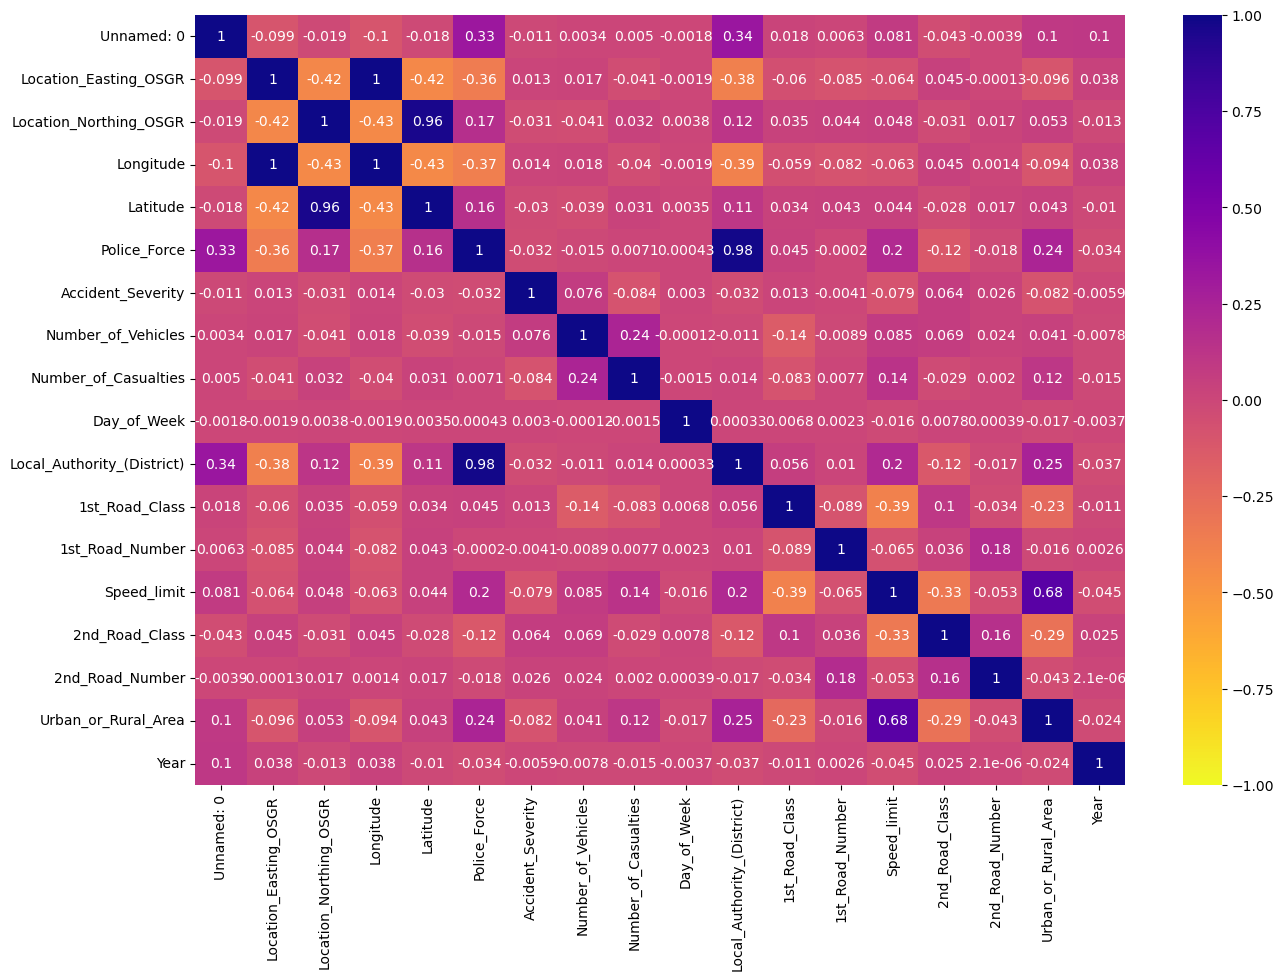

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, cmap='plasma_r')

<AxesSubplot:>

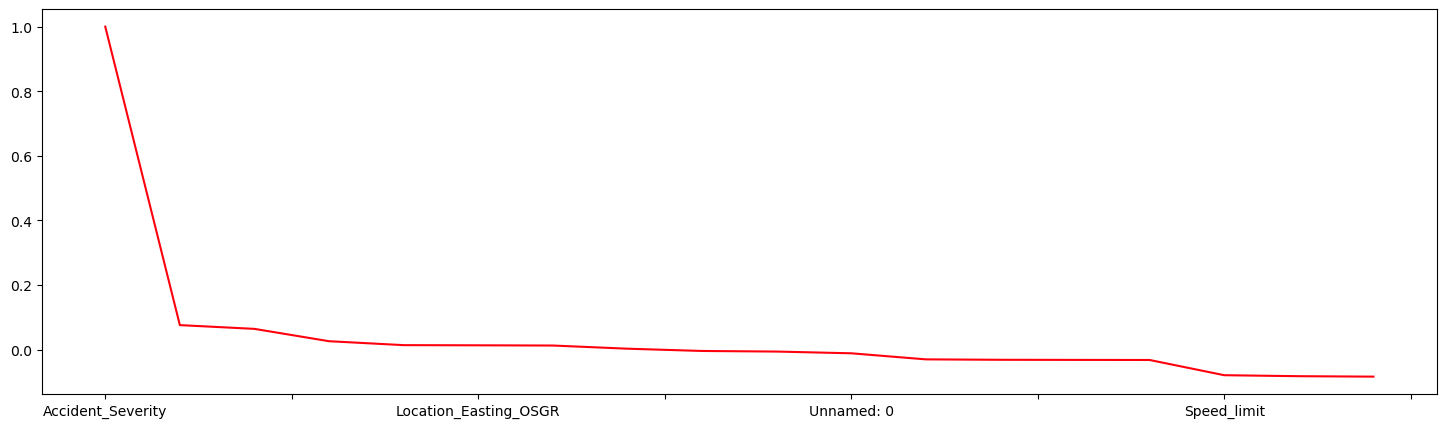

In [42]:
plt.figure(figsize=(18,5))
corr_matrix['Accident_Severity'].sort_values(ascending=False).plot(color='#ff000d')

In [43]:
final_accident_severity_df = accident_severity_df.copy()
final_accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1504150 non-null  int64  
 1   Location_Easting_OSGR       1504049 non-null  float64
 2   Location_Northing_OSGR      1504150 non-null  float64
 3   Longitude                   1504049 non-null  float64
 4   Latitude                    1504150 non-null  float64
 5   Police_Force                1504150 non-null  int64  
 6   Accident_Severity           1504150 non-null  int64  
 7   Number_of_Vehicles          1504150 non-null  int64  
 8   Number_of_Casualties        1504150 non-null  int64  
 9   Day_of_Week                 1504150 non-null  int64  
 10  Local_Authority_(District)  1504150 non-null  int64  
 11  1st_Road_Class              1504150 non-null  int64  
 12  1st_Road_Number             1504150 non-null  int64  
 1

In [44]:
# deleting the columns with correlation < 0.02 and >-0.02 as they are not much impactful compared to others
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes != 'object'].index :
    if(corr_matrix['Accident_Severity'][feature] < 0.02 and  corr_matrix['Accident_Severity'][feature] > -0.02) :
        final_accident_severity_df.drop(columns = feature, inplace = True) 
        
# Inversely proportional columns as well as they can impact the Accident_severity (> -0.02)

In [45]:
# Impactful columns for Accident_Severity are as follows
final_accident_severity_df.sample(4)

,Location_Northing_OSGR,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
400091,167860.0,51.390792,1,3,2,1,19,30,-1,0,1
707357,159120.0,51.328871,52,3,1,1,605,40,-1,0,2
1209894,838980.0,57.419754,91,2,2,4,927,60,-1,0,2
1438193,300138.0,52.596198,33,3,2,2,360,50,3,563,1


## Predicting accident severity
### logistic regression- cross validation=5

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [47]:
check = final_accident_severity_df.copy()
severity = check['Accident_Severity']
severity = pd.DataFrame(severity, columns = ['Accident_Severity'])

In [48]:
severity.sample(3)

,Accident_Severity
725641,3
40853,1
901975,3


<u>**Multiclass classification**</u> with logistic regression can be done either through the one-vs-rest scheme in which for each class a binary classification problem of data belonging or not to that class is done, or changing the loss function to cross- entropy loss.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’ and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently, the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’ and ‘newton-cg’ solvers.) By default, multi_class is set to ’ovr’.

In [50]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 100)

In [52]:
score = cross_val_score(model, check, severity, cv = 5)
score.mean()

/Users/amisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

0.8511152478143803